In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from collections import Counter
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### 데이터 읽어오기

In [3]:
train = pd.read_csv("./data/train.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [67]:
# Na 수 확인
tmp = pd.isnull(train).sum()
for i in range(len(tmp)):
    if tmp[i] != 0:
        print(tmp.index[i], ' '*(20-len(tmp.index[i])), tmp[i])

LotFrontage           259
Alley                 1369
MasVnrType            8
MasVnrArea            8
BsmtQual              37
BsmtCond              37
BsmtExposure          38
BsmtFinType1          37
BsmtFinType2          38
Electrical            1
FireplaceQu           690
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
GarageCond            81
PoolQC                1453
Fence                 1179
MiscFeature           1406


### 수치형 변수 살펴보기

In [43]:
# Categorizing variables 
num_col = []
cat_col = []

for column in train.columns[~pd.Series(train.columns).isin(['Id', 'SalePrice'])]:
    if type(train[column][0]) is not str:
        num_col.append(column)
    else:
        cat_col.append(column)

tmp = ['MSSubClass', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'] # Handwork ! 
num_col = list(set(num_col) - set(tmp))
cat_col += tmp

In [70]:
# Corrleation & # of na's
for col in num_col:
    na_idx = pd.isnull(train[col])
    corr = np.corrcoef(x= train[col][~na_idx], y=train['SalePrice'][~na_idx])[0,1]
    print(col, ' '* (20-len(col)), corr,
         ' '* (20-len(str(corr))), sum(na_idx))

TotRmsAbvGrd          0.5337231555820281    0
LotFrontage           0.351799096570678     259
GarageYrBlt           0.48636167748786086   81
OpenPorchSF           0.3158562271160552    0
MoSold                0.046432245223819356  0
WoodDeckSF            0.3244134445681296    0
YearBuilt             0.5228973328794968    0
TotalBsmtSF           0.6135805515591954    0
GrLivArea             0.7086244776126521    0
BsmtFullBath          0.22712223313149438   0
BsmtFinSF2            -0.011378121450215137  0
BedroomAbvGr          0.16821315430074002   0
GarageArea            0.6234314389183616    0
MiscVal               -0.021189579640303245  0
ScreenPorch           0.11144657114291115   0
KitchenAbvGr          -0.1359073708421411   0
YearRemodAdd          0.5071009671113862    0
BsmtFinSF1            0.3864198062421531    0
YrSold                -0.028922585168730287  0
BsmtUnfSF             0.2144791055469689    0
2ndFlrSF              0.3193338028320677    0
GarageCars            0.6404

In [75]:
# top N's highest corr variables
col_corr = []
for col in num_col:
    na_idx = pd.isnull(train[col])
    corr = np.corrcoef(x= train[col][~na_idx], y=train['SalePrice'][~na_idx])[0,1]
    col_corr.append((col, abs(corr)))
col_corr.sort(key=lambda x : -x[1])

In [76]:
col_corr

[('OverallQual', 0.7909816005838052),
 ('GrLivArea', 0.7086244776126521),
 ('GarageCars', 0.6404091972583522),
 ('GarageArea', 0.6234314389183616),
 ('TotalBsmtSF', 0.6135805515591954),
 ('1stFlrSF', 0.6058521846919145),
 ('FullBath', 0.5606637627484456),
 ('TotRmsAbvGrd', 0.5337231555820281),
 ('YearBuilt', 0.5228973328794968),
 ('YearRemodAdd', 0.5071009671113862),
 ('GarageYrBlt', 0.48636167748786086),
 ('MasVnrArea', 0.4774930470957155),
 ('Fireplaces', 0.46692883675152796),
 ('BsmtFinSF1', 0.3864198062421531),
 ('LotFrontage', 0.351799096570678),
 ('WoodDeckSF', 0.3244134445681296),
 ('2ndFlrSF', 0.3193338028320677),
 ('OpenPorchSF', 0.3158562271160552),
 ('HalfBath', 0.2841076755947825),
 ('LotArea', 0.2638433538714056),
 ('BsmtFullBath', 0.22712223313149438),
 ('BsmtUnfSF', 0.2144791055469689),
 ('BedroomAbvGr', 0.16821315430074002),
 ('KitchenAbvGr', 0.1359073708421411),
 ('EnclosedPorch', 0.12857795792595658),
 ('ScreenPorch', 0.11144657114291115),
 ('PoolArea', 0.092403549491

In [204]:
# Linear Regression Analysis 
dat = train.fillna(-99)
dat[num_col] = StandardScaler().fit_transform(X=dat[num_col])

model = LinearRegression(normalize=True)
model.fit(X = dat[num_col], y=train['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [205]:
sorted(list(zip(num_col, model.coef_)), key = lambda x: -abs(x[1]))

[('GrLivArea', 6.246700964835834e+16),
 ('2ndFlrSF', -5.189275732547919e+16),
 ('1stFlrSF', -4.5956006587386216e+16),
 ('BsmtFinSF1', 1.3699045380059112e+16),
 ('BsmtUnfSF', 1.3271608879873062e+16),
 ('TotalBsmtSF', -1.3176648332728572e+16),
 ('LowQualFinSF', -5780117760541151.0),
 ('BsmtFinSF2', 4845273600640889.0),
 ('OverallQual', 22773.450537334764),
 ('GarageCars', 11464.713687891859),
 ('YearBuilt', 10122.868384377054),
 ('TotRmsAbvGrd', 9411.804622602544),
 ('BedroomAbvGr', -7175.110976348393),
 ('GarageYrBlt', -6555.705970332423),
 ('OverallCond', 6062.887684695429),
 ('KitchenAbvGr', -6031.3628940176795),
 ('MasVnrArea', 4715.662596725249),
 ('LotArea', 4525.450701965836),
 ('BsmtFullBath', 3609.768337829753),
 ('WoodDeckSF', 3217.394116950233),
 ('ScreenPorch', 3135.8801029198144),
 ('Fireplaces', 2692.9397323628873),
 ('YearRemodAdd', 2352.8536353719824),
 ('GarageArea', 2064.988891094286),
 ('PoolArea', -1510.9012131048707),
 ('LotFrontage', 1480.2914287936446),
 ('FullBath

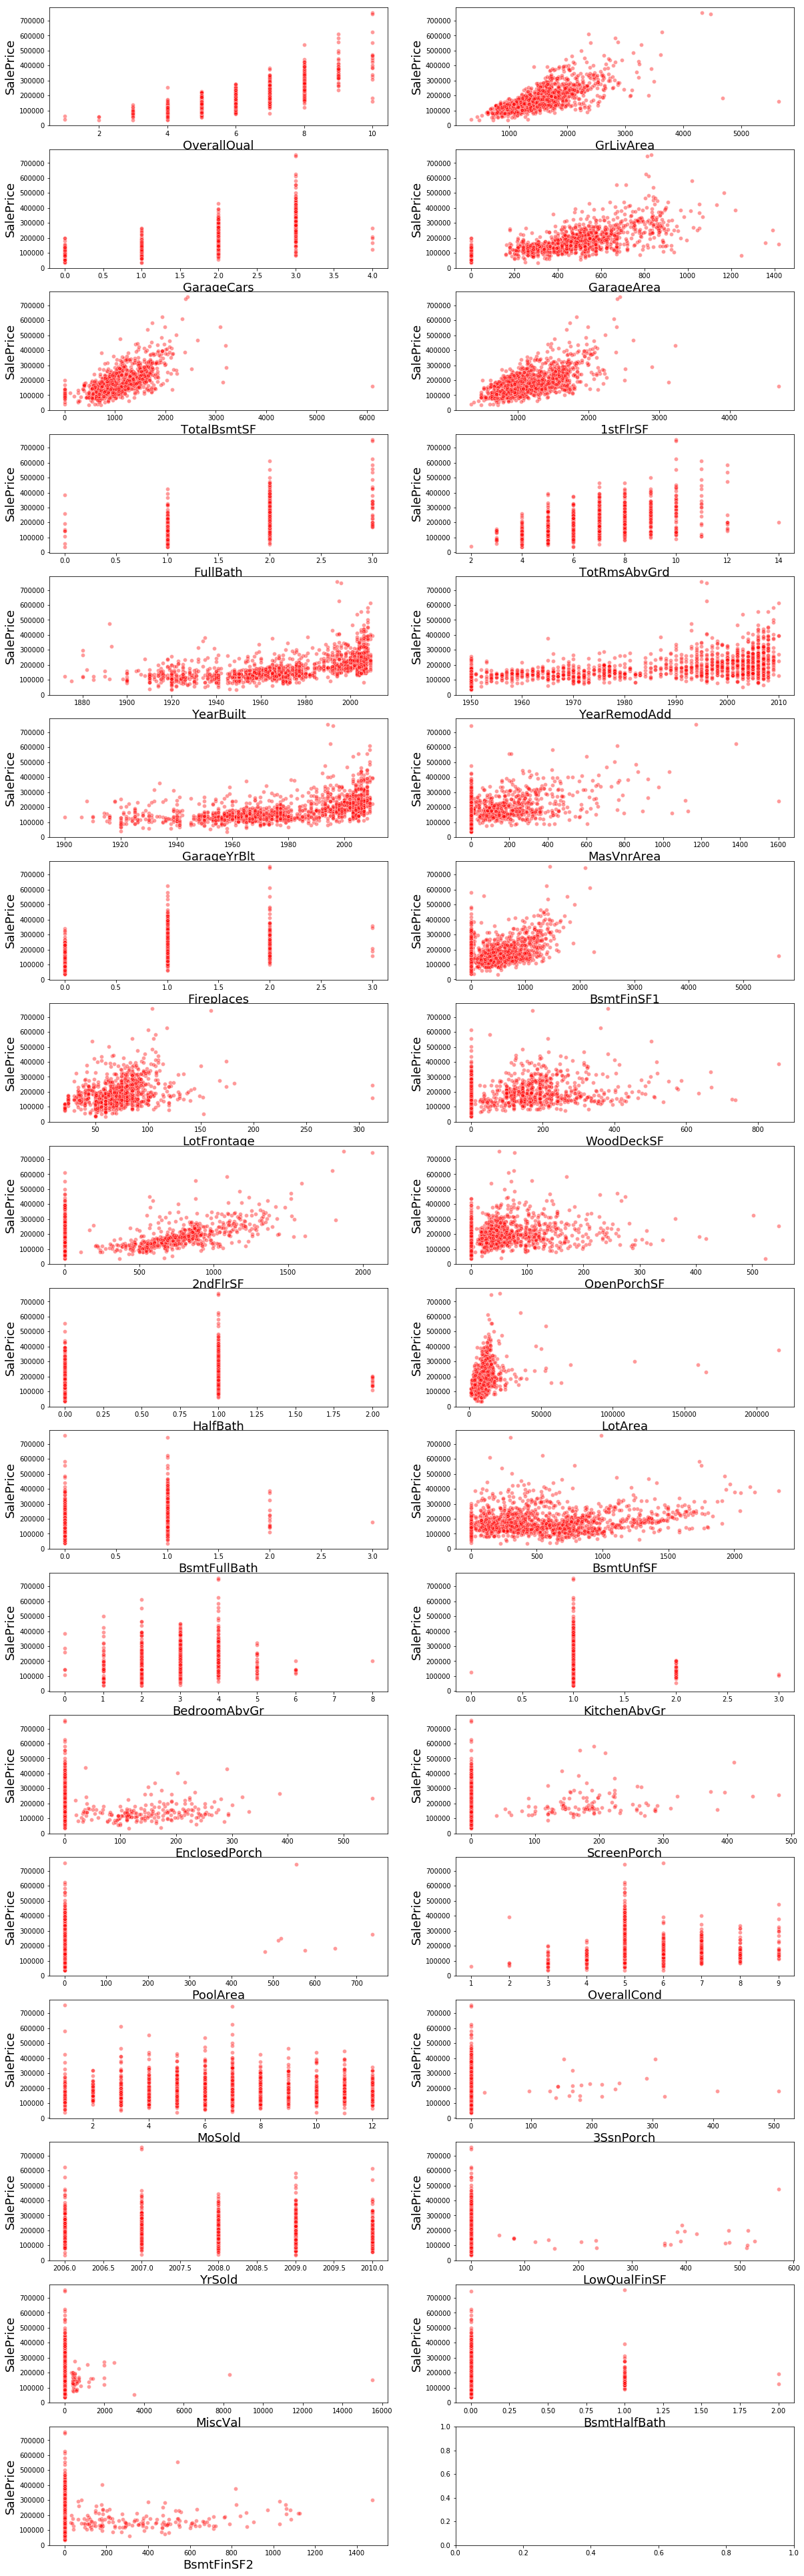

In [206]:
# Visulzation of Top N Numeric Variables
N=len(col_corr)
top_N_num = [set[0] for set in col_corr[:N]]

fig, ax = plt.subplots(N//2+1,2, figsize=(20,N*2))
for i, col in enumerate(top_N_num):
    sns.scatterplot(data=train, 
             x=col, 
             y="SalePrice", 
             alpha=0.4, 
             color='red',
             ax=ax[i//2][i%2])
    ax[i//2][i%2].set_xlabel(col, fontsize=18)
    ax[i//2][i%2].set_ylabel('SalePrice', fontsize=18)
plt.show()

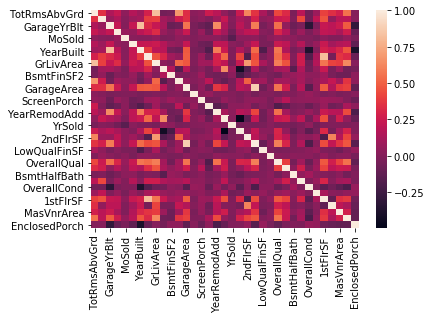

In [237]:
# Correlation of each other
corr_table = train[num_col].corr()
sns.heatmap(corr_table)
plt.show()

In [232]:
high_cor_list = []
tmp = corr_table[abs(corr_table)>0.5]
for col in tmp.columns:
    for row in tmp[col][~pd.isnull(tmp[col])].index:
        if col == row:
            break
        high_cor_list.append((col,row, tmp[col][row]))
high_cor_list.sort(key = lambda x : -x[2])
high_cor_list

[('GarageCars', 'GarageArea', 0.8824754142814603),
 ('YearBuilt', 'GarageYrBlt', 0.8256674841743434),
 ('GrLivArea', 'TotRmsAbvGrd', 0.8254893743088377),
 ('1stFlrSF', 'TotalBsmtSF', 0.8195299750050355),
 ('2ndFlrSF', 'GrLivArea', 0.6875010641666008),
 ('BedroomAbvGr', 'TotRmsAbvGrd', 0.6766199357426479),
 ('BsmtFinSF1', 'BsmtFullBath', 0.6492117535742737),
 ('YearRemodAdd', 'GarageYrBlt', 0.6422767797035414),
 ('FullBath', 'GrLivArea', 0.6300116462511144),
 ('2ndFlrSF', 'TotRmsAbvGrd', 0.6164226354915353),
 ('HalfBath', '2ndFlrSF', 0.6097073002717444),
 ('OverallQual', 'GarageCars', 0.6006707165907189),
 ('OverallQual', 'GrLivArea', 0.5930074300286511),
 ('YearRemodAdd', 'YearBuilt', 0.5928549763436497),
 ('GarageCars', 'GarageYrBlt', 0.5889200070047019),
 ('OverallQual', 'YearBuilt', 0.572322768962362),
 ('1stFlrSF', 'GrLivArea', 0.5660239689357487),
 ('GarageArea', 'GarageYrBlt', 0.5645670607230588),
 ('OverallQual', 'GarageArea', 0.5620217566126064),
 ('FullBath', 'TotRmsAbvGrd', 0

C:\Users\CSH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


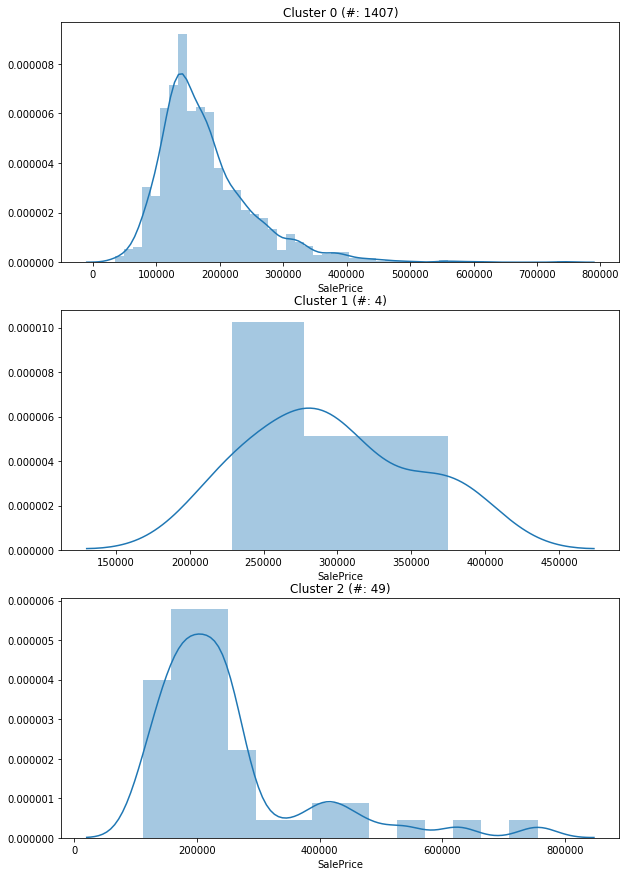

In [269]:
# 군집화
km = KMeans(n_clusters=3)
km.fit(train[num_col].fillna(0))
cnt = Counter(km.labels_)

f, ax = plt.subplots(3,1, figsize=(10,15))
for i in range(3):
    sns.distplot(train['SalePrice'][km.labels_ == i], ax=ax[i])
    ax[i].set_title("Cluster {} (#: {})".format(i, cnt[i]))
plt.show()

### 범주형 데이터 살펴보기!

In [153]:
# top N's lowest P-value variables
col_aov = []
for col in cat_col:
    result = ols('SalePrice ~ {}'.format(col), data = train).fit()
    aov_table = sm.stats.anova_lm(result)
    aov_pr = aov_table['PR(>F)'][0]
    col_aov.append((col, aov_pr))

col_aov.sort(key = lambda x: x[1]) # pvlue가 작은순

C:\Users\CSH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\CSH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\CSH\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


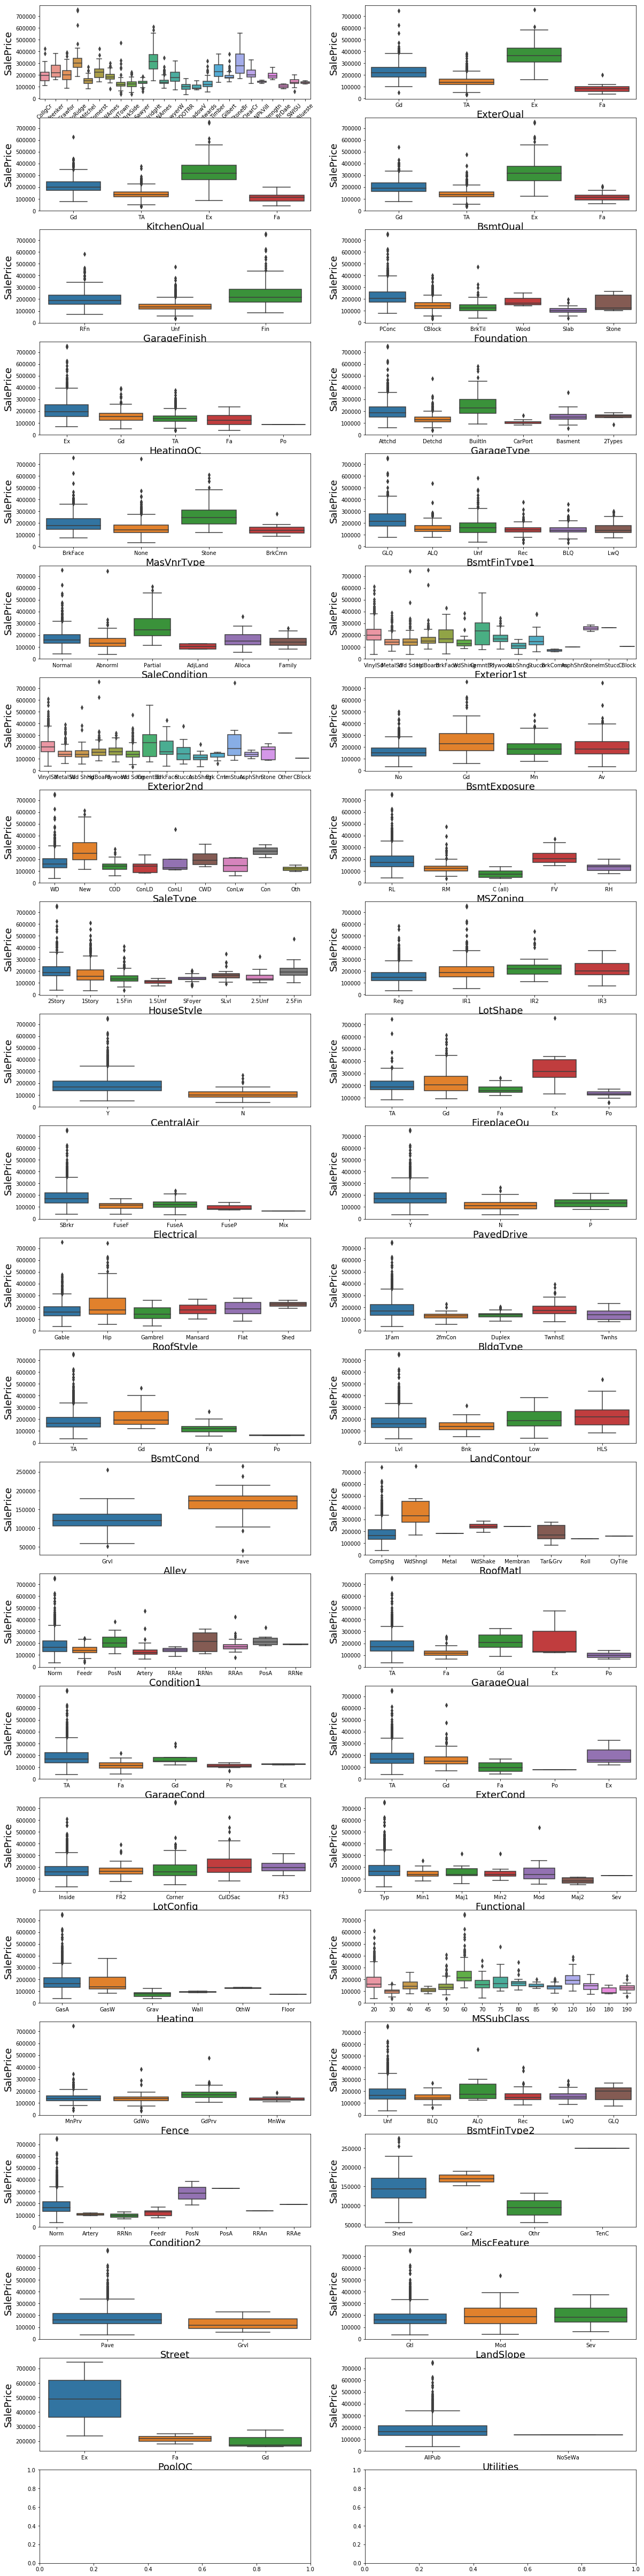

In [207]:
# Visulzation of Top N Numeric Variables
N=len(col_aov)
top_N_num = [set[0] for set in col_aov[:N]]

fig, ax = plt.subplots(N//2+1,2, figsize=(20,N*2))
plt.setp(ax[0][0].get_xticklabels(), rotation=45)
for i, col in enumerate(top_N_num):
    sns.boxplot(x=col, y='SalePrice', data=train, ax=ax[i//2][i%2])
    ax[i//2][i%2].set_xlabel(col, fontsize=18)
    ax[i//2][i%2].set_ylabel('SalePrice', fontsize=18)
plt.show()